importing data using pandas

In [3]:
import pandas as pd

test = pd.read_csv('test.csv')
test.head()
train = pd.read_csv('train.csv')

In [4]:
# show the information of dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# show statistikk deskriptif
train.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [6]:
#show the missing value
missing_value = train.isnull().sum()
missing_value[missing_value > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

mengatasi missing value, dipisahkan yang lebih dari 75% dan kurang dari 75%

In [7]:
#  kurang dari 75%
less = missing_value[missing_value < 1000].index
over = missing_value[missing_value > 1000].index


mengatasi missing value dapat dilakukan dengan:
1. mengisi nilai yang hilang dengan median untuk value kurang dari 75%
sytaksnya:
fungsi untuk mengisi = datafile[less].select_dtypes(include=['number]).columns
datafile[fungsi untuk mengisi NaN] = datafile[fungsi untuk mengisi NaN].fillna(datafile[fungsi untuk mengisi].median()), digunakan median karena data yang hilang diisi dengan median
sintaks baris pertama digunakan untuk memilih nama nama kolom data dataframme train, yang dipilih dengan tipe data numerik dari kolom less.
lalu sintaks baris kedua untuk mengisi semua nilai yang hilang dengan median masing masing kolom
2. untuk tipe data string dan object, bisa digunakan pendekatan mengisi dengan modus, dan kategori baru (unknows or missing)
3. menghapus kolom dengan banyak nilai yang hilang
misal kalau dibatasi 75%
dilakukan dengan mengambil index yang memiliki missing value lebi dari batasan yang sudah ditendtukan

In [15]:
numeric_features = train[less].select_dtypes(include=['number']).columns
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median())

In [ ]:
# dengan modus
kategorical_features = train[less].select_dtypes(include=['object']).columns
for column in kategorical_features:
    train[column] = train[column].fillna(train[column].mode()[0])
    #kode ini untuk melakukan pengulangan pada setiap kolom berisi data kategorei 
                                        


In [16]:
# dengan penghapusan
df = train.drop(columns = over) # dilakukan perubahan nama dataframe agar data asli tidak berubah 
missing_value= df.isnull().sum()
missing_value[missing_value > 0]

MasVnrType      872
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

Mengatasi Outliers
dengan metode IQR

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[feature])
    plt.title(feature)
    plt.show()

mengidentifikasi outlier dengan IQR

In [21]:
# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]
 
# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

kalau gamau hapus outliers:
```
median = df['column_name'].median()
df['column_name'] = df['column_name'].apply(lambda x: median if x < (Q1 - 1.5  IQR) or x > (Q3 + 1.5  IQR) else x)

Normalisasi data dan standardisasi data:  merupakan teknik preposesing data yang digunakan untuk menyiapkan data sebelum analisis atau pemodelan
normalisasi: mengu ah fitur hanya dalam skala rentang tertentu
stansardisasi: mengubah skala pada suatu fitur sehinggamemiliki rata rata 0 dan std 1


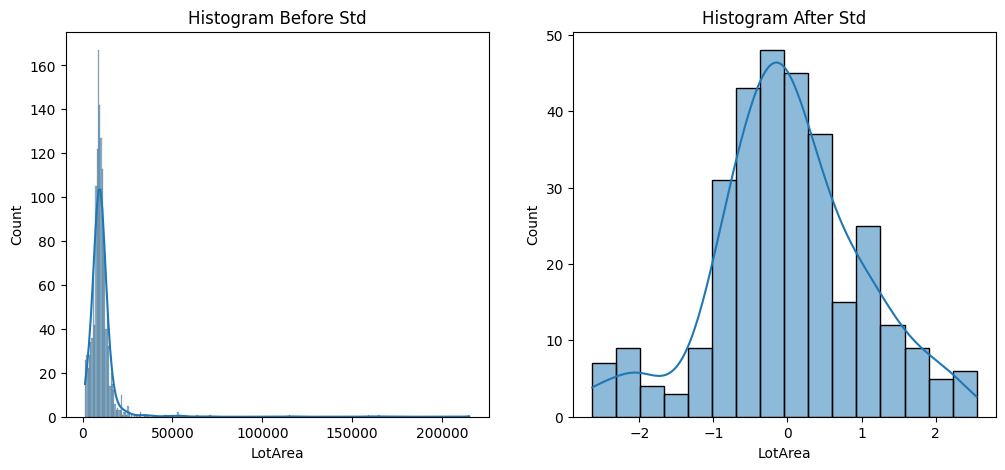

In [23]:
# standardisasi
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# plot sebelum standardisasi
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.histplot(train[numeric_features[3]], kde = True)
plt.title("Histogram Before Std")

# plot sesudah standardisasi
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[3]], kde = True)
plt.title("Histogram After Std")
plt.show()

Konversi tipe data
1. one hot encoding: mengubah kategori emnjadi kolom biner terpisah dengan nilai 0 dan 1
2. label encoding: memberikan label numerik setiap kategori
3. ordinar encoding: mengonversi kategori yang menjadi urutan menjadi nilai numerik


In [24]:
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
18,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,RRAe,Norm,...,Gd,Typ,NaN,Detchd,Unf,TA,TA,Y,WD,Normal
23,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,...,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,WD,Normal
1441,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1444,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1454,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal


In [25]:
# one hot encoding
df_one_hot = pd.get_dummies(df, columns = category_features)
df_one_hot

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_COD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.793852,0.262493,-0.347343,-0.283947,0.607672,-0.436704,0.647465,0.606588,1.315092,0.674877,...,False,False,False,False,False,True,False,False,True,False
2,-1.788952,0.262493,-0.057420,0.967055,0.607672,-0.436704,0.543193,0.544249,0.960847,0.127328,...,False,False,False,False,False,True,False,False,True,False
6,-1.779153,-1.018266,0.619067,0.446102,1.608542,-0.436704,0.699601,0.731265,1.210903,2.324991,...,False,False,False,False,False,True,False,False,True,False
18,-1.749756,-1.018266,-0.250702,2.059448,-1.394070,-0.436704,0.699601,0.668926,-0.727029,0.525545,...,False,False,False,False,False,True,False,False,True,False
23,-1.737507,2.183632,-2.376804,-2.172067,-1.394070,2.884401,-0.760200,-1.076556,-0.727029,1.008384,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1.724018,-1.018266,-0.830548,-0.038215,-2.394941,1.223849,-1.020879,-1.388250,-0.727029,0.450880,...,False,False,False,False,False,True,False,False,True,False
1441,1.736266,2.183632,0.039221,-2.081816,-0.393199,-0.436704,0.699601,0.668926,0.804562,0.652477,...,False,False,False,False,False,True,False,False,True,False
1444,1.743616,-1.018266,-0.540625,-0.261608,0.607672,-0.436704,0.699601,0.668926,0.377384,-1.082258,...,False,False,False,False,False,True,False,False,True,False
1454,1.768113,-1.018266,-0.637266,-0.708394,0.607672,-0.436704,0.699601,0.731265,-0.727029,-0.061826,...,False,False,False,False,False,True,False,False,True,False


In [26]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])
df_lencoder

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.793852,0.262493,-0.347343,-0.283947,0.607672,-0.436704,0.647465,0.606588,1.315092,0.674877,...,2,2,5,0,1,2,2,2,5,2
2,-1.788952,0.262493,-0.057420,0.967055,0.607672,-0.436704,0.543193,0.544249,0.960847,0.127328,...,2,2,4,0,1,2,2,2,5,2
6,-1.779153,-1.018266,0.619067,0.446102,1.608542,-0.436704,0.699601,0.731265,1.210903,2.324991,...,2,2,2,0,1,2,2,2,5,2
18,-1.749756,-1.018266,-0.250702,2.059448,-1.394070,-0.436704,0.699601,0.668926,-0.727029,0.525545,...,2,2,5,2,2,2,2,2,5,2
23,-1.737507,2.183632,-2.376804,-2.172067,-1.394070,2.884401,-0.760200,-1.076556,-0.727029,1.008384,...,3,2,4,0,2,2,2,2,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1.724018,-1.018266,-0.830548,-0.038215,-2.394941,1.223849,-1.020879,-1.388250,-0.727029,0.450880,...,3,2,5,2,2,2,2,2,5,2
1441,1.736266,2.183632,0.039221,-2.081816,-0.393199,-0.436704,0.699601,0.668926,0.804562,0.652477,...,2,2,4,0,1,2,2,2,5,2
1444,1.743616,-1.018266,-0.540625,-0.261608,0.607672,-0.436704,0.699601,0.668926,0.377384,-1.082258,...,2,2,5,0,1,2,2,2,5,2
1454,1.768113,-1.018266,-0.637266,-0.708394,0.607672,-0.436704,0.699601,0.731265,-0.727029,-0.061826,...,2,2,5,0,1,2,2,2,5,2


Explanatory Data Analysis

In [27]:
df_lencoder.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.793852,0.262493,-0.347343,-0.283947,0.607672,-0.436704,0.647465,0.606588,1.315092,0.674877,...,2,2,5,0,1,2,2,2,5,2
2,-1.788952,0.262493,-0.057420,0.967055,0.607672,-0.436704,0.543193,0.544249,0.960847,0.127328,...,2,2,4,0,1,2,2,2,5,2
6,-1.779153,-1.018266,0.619067,0.446102,1.608542,-0.436704,0.699601,0.731265,1.210903,2.324991,...,2,2,2,0,1,2,2,2,5,2
18,-1.749756,-1.018266,-0.250702,2.059448,-1.394070,-0.436704,0.699601,0.668926,-0.727029,0.525545,...,2,2,5,2,2,2,2,2,5,2
23,-1.737507,2.183632,-2.376804,-2.172067,-1.394070,2.884401,-0.760200,-1.076556,-0.727029,1.008384,...,3,2,4,0,2,2,2,2,5,2


cek it again if it the NaN still exist

In [29]:
missing_values =  df_lencoder.isnull().sum()
missing_percentage = (missing_values / len(df_lencoder)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

missing_data[missing_data['Missing Values'] > 0] # menampilkan kolom dengan missing value

,Missing Values,Missing Percentage


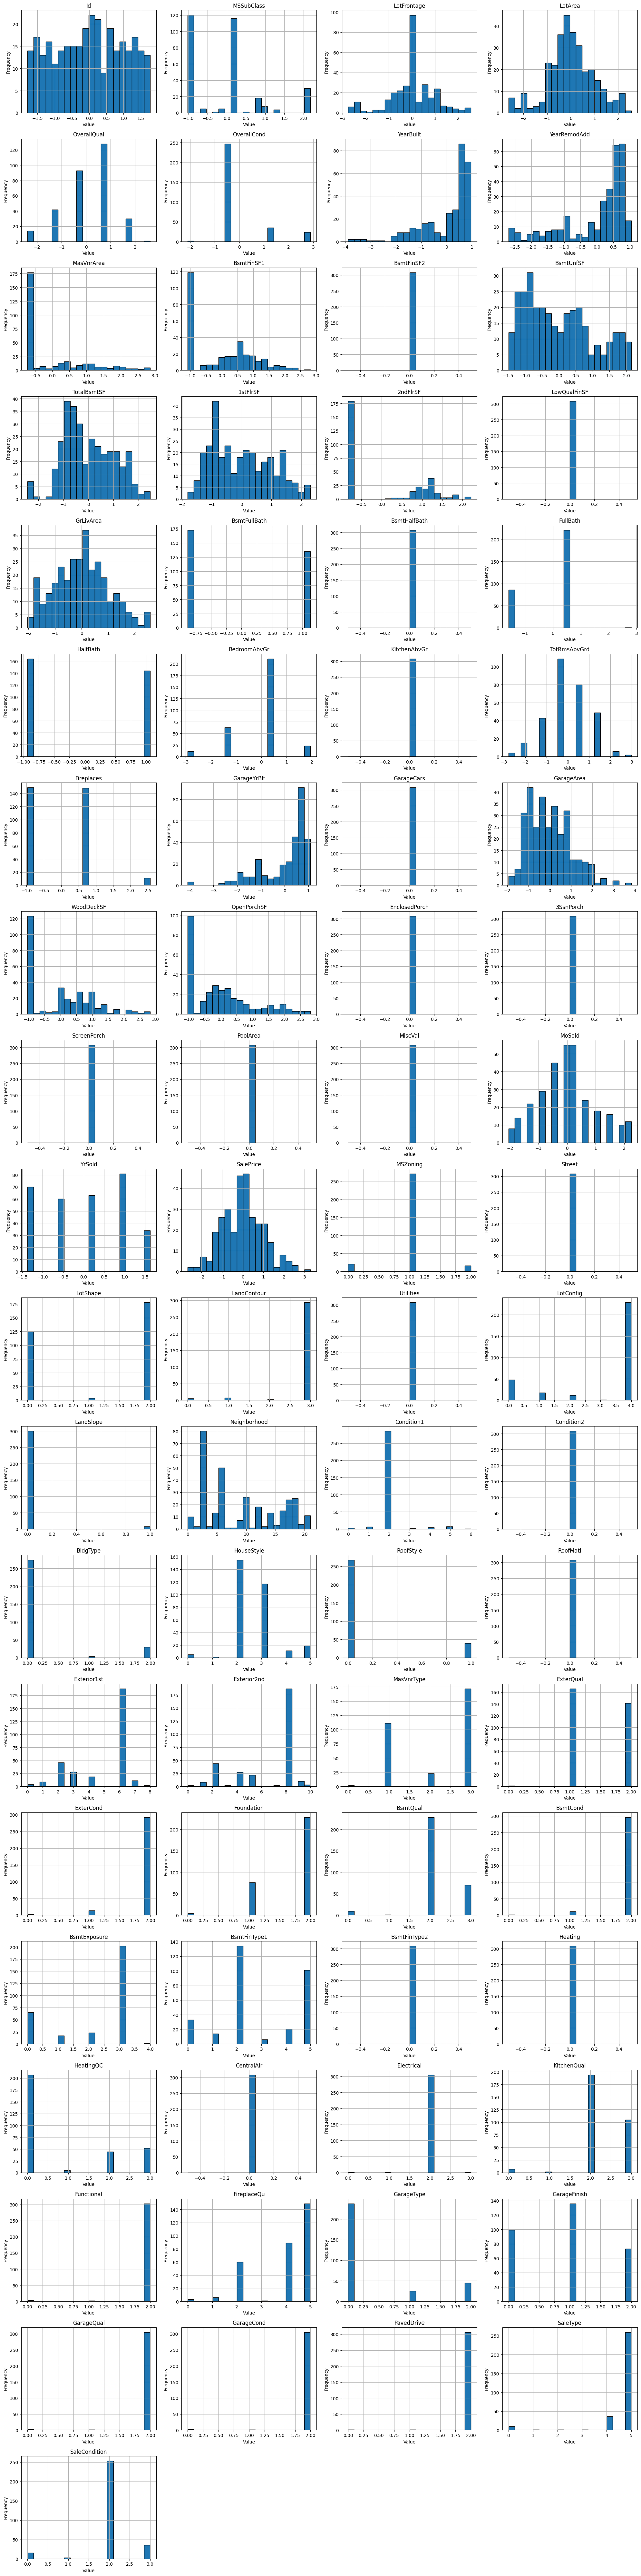

In [30]:
# do the analysis descriptive

#menghitung jumlah variabel
num_vars = df_lencoder.shape[1]

#menentukan abris dan kolom untuk grid subplot
n_cols = 4 
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(df_lencoder.columns):
    df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
 
# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
 
# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

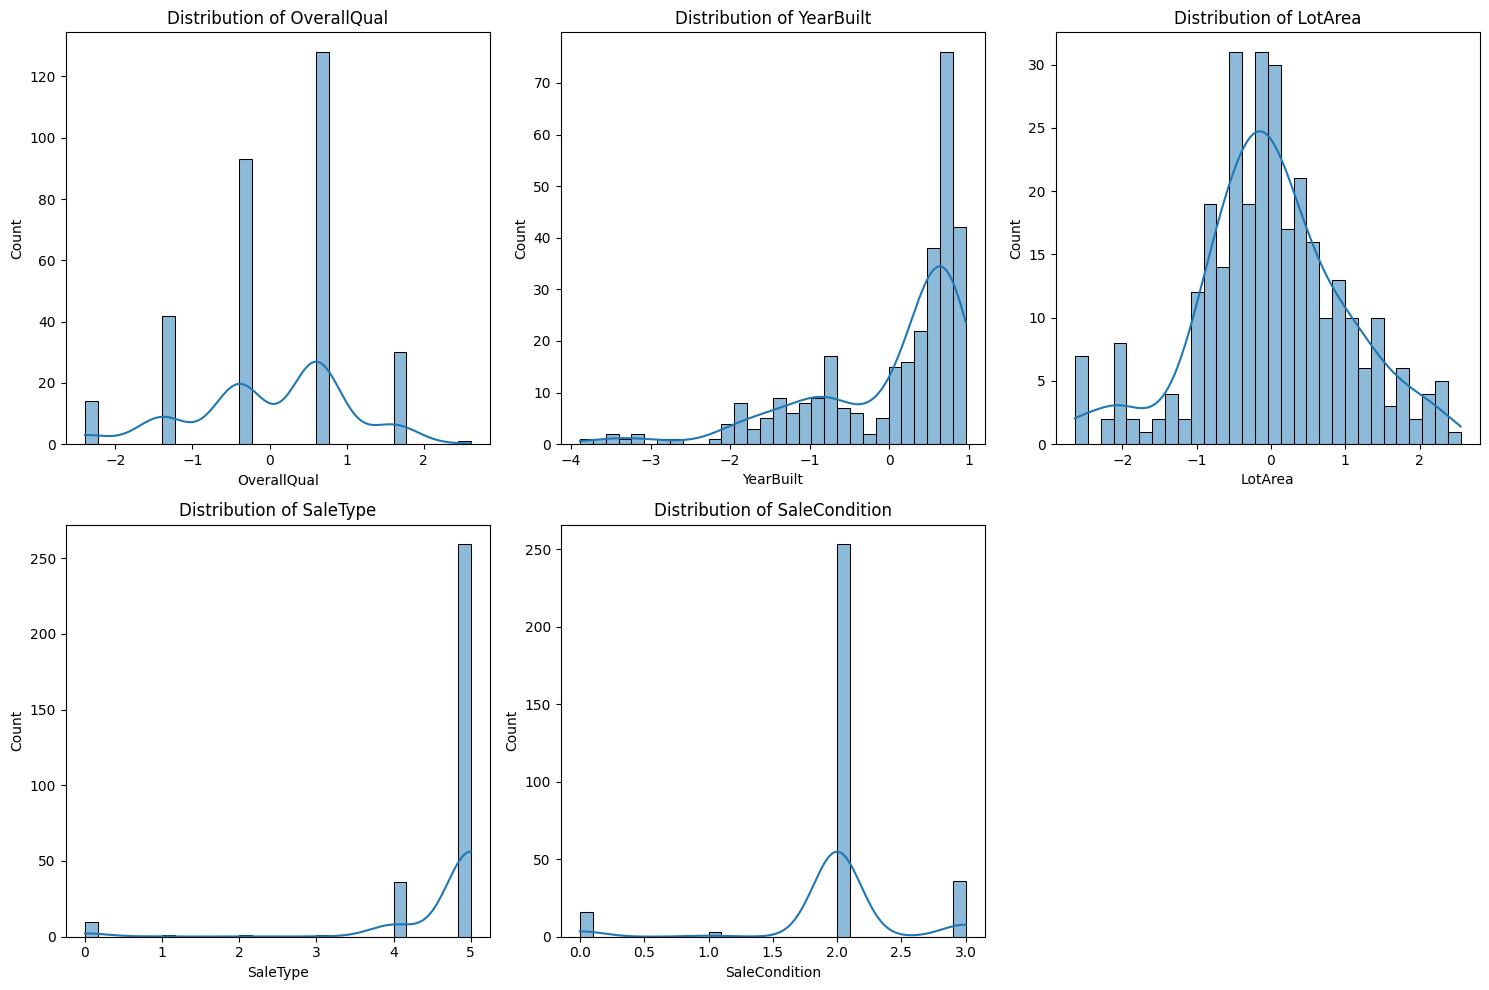

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition']
 
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_lencoder[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
 
plt.tight_layout()
plt.show()

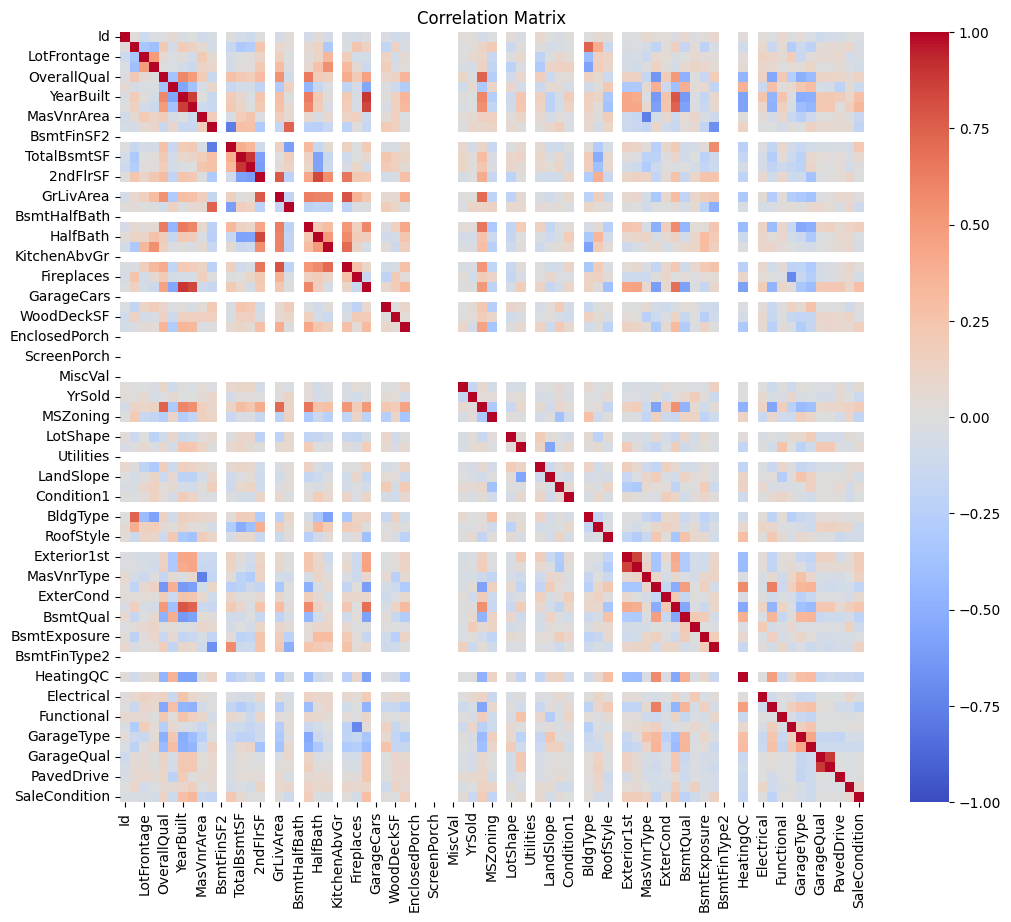

In [32]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df_lencoder.corr()
 
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

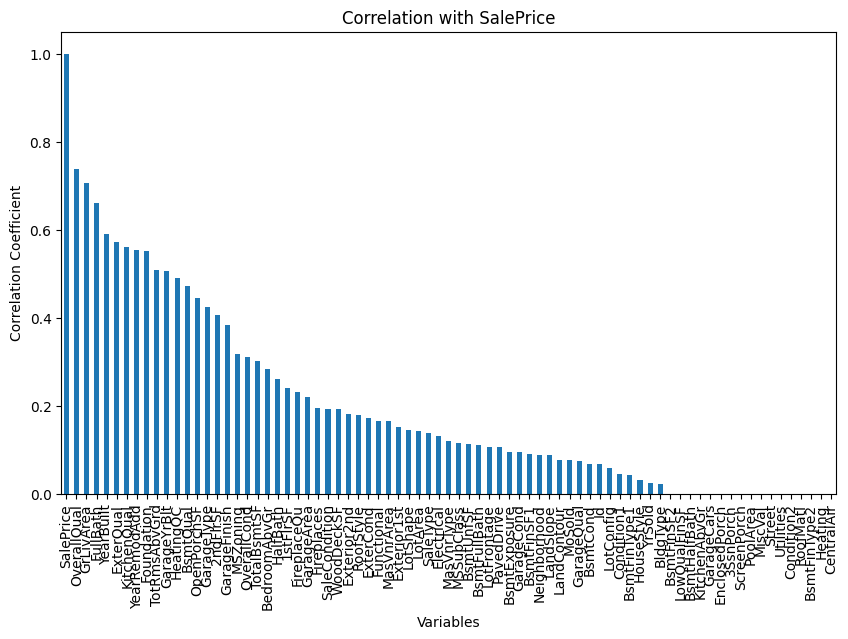

In [33]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df_lencoder.corr()['SalePrice']
 
# (Opsional) Mengurutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)
 
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with SalePrice')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

Data Splitting
Proses pembagian dataset menjadi beberapa subset yang terpisah untuk pelatihan, validasi, dan pengujian model machine learning. 
training set (pelatihan): untuk melatih model dan menyesuaikan parameternya, sekitar 60-80% dari total dataset

validation set: digunakan untuk melakukan validasi selama proses pelatihan, sekitar 10-20%

test set: digunakan untuk melakukan pengujian akhit setelah model dilatih dan dituning, sekitar 10-20%

In [37]:
import sklearn

#memisahkan atribut dan label, yaitu fitur x dan target y
x = df_lencoder.drop(columns=['SalePrice'])
y = df_lencoder['SalePrice']

disini, X = kumpulan atribur atau fittur dari dataset, semua kolom kecuali kolom target/ Ingat, disini targetnya itu SalePrice
y = target atau label yang berupa kolom yang ingin dipisahkan (disini targetnta sale price)
test size = presentase dari data yang digunakan sebagai test set
random state = parameter yang memastikan pemisahan data yang konsisiten setiap kali fungsi dijalankan

In [38]:
from sklearn.model_selection import train_test_split
 
# membagi dataset menjadi training dan testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [40]:
# menghitung panjang/jumlah data 
print("Jumlah data: ",len(x))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  308
Jumlah data latih:  246
Jumlah data test:  62


Data Modelling
regresi: kalau targetnya emrupakan nilai yang kontinyu
klasifikasi: kalau targetnya nilai variabel kategori
clustering: untuk mengelompokkan data ke dalam beberapa kategori atau cluster

ingat:
fitur adalah data inut yang digunakan untuk melatih modekl
target adalah data output yang menjadi referensi model untuk belaajr

nah untuk menentukan algoritma yang dipakai, bisa dipertimbangkan beberapa hal, seperti jenis data, ukuran dataset, dan linearitas antara fitur dan target

In [44]:
# Melatih model 1 dengan algoritma Least Angle Regression
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

# Melatih model 2 dengan algoritma Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)
 
# Melatih model 3 dengan algoritma Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(random_state=184)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
# Evaluasi pada model LARS
pred_lars = lars.predict(x_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)
 
# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}
 
# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['Lars'])
df_results

,MAE,MSE,R2
Lars,0.714821,0.877167,0.070375


In [46]:
# Evaluasi pada model Linear Regression
pred_LR = LR.predict(x_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)
 
# Menambahkan hasil evaluasi LR ke DataFrame
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
Lars,0.714821,0.877167,0.070375
Linear Regression,0.353994,0.273887,0.709734


In [47]:
# Evaluasi pada model Linear Regression
pred_GBR = GBR.predict(x_test)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)
 
# Menambahkan hasil evaluasi LR ke DataFrame
df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Lars,0.714821,0.877167,0.070375
Linear Regression,0.353994,0.273887,0.709734
GradientBoostingRegressor,0.315420,0.234956,0.750993


dari hasil diatas, bisa diamati bahwasanya algoritma yang paling tepat adalah gradient boosting regressor

menyimpan model
bisa digunakan library dari python

In [48]:
import joblib
 
# Menyimpan model ke dalam file
joblib.dump(GBR, 'gbr_model.joblib')

['gbr_model.joblib']

In [49]:
import pickle
 
# Menyimpan model ke dalam file
with open('gbr_model.pkl', 'wb') as file:
    pickle.dump(GBR, file)

Deployment dan monitoring
deployment: proses pelatihan model dengan mengintegrasukan ke aplikasi atau sistem produksi
monitoring: proses memastikan bahwa model bekerja dengan baik setelah deployment

setelah model dimuat, bisa dilakukan deployment ke dalam berbagai aplikasi produksi kayak API, FLask, web app, dll

In [50]:
# Memuat model dari file joblib
joblib_model = joblib.load('gbr_model.joblib')
 
# Memuat model dari file pickle
with open('gbr_model.pkl', 'rb') as file:
    pickle_model = pickle.load(file)

In [53]:
from flask import Flask, request, jsonify
import joblib
 
# Inisialisasi aplikasi Flask
app = Flask(__name__)
 
# Memuat model yang telah disimpan
joblib_model = joblib.load('gbr_model.joblib') # Pastikan path file sesuai dengan penyimpanan Anda
 
@app.route('/predict', methods=['POST'])
def predict():
    data = request.json['data']  # Mengambil data dari request JSON
    prediction = joblib_model.predict(data)  # Melakukan prediksi (harus dalam bentuk 2D array)
    return jsonify({'prediction': prediction.tolist()})
 
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1